In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
import seaborn as sns
import requests
from wwo_hist import retrieve_hist_data

import os
print(os.listdir("C:/input"))
os.chdir("C:/input")


['boise.csv', 'boiseunedited.csv']


In [2]:
#direct filepath to .csv will have to be edited to wherever .csv is on disk
rainData = pd.read_csv('C:/input/boise.csv')
rainData.sample(5)

,date_time,maxtempC,mintempC,cloudcover,humidity,pressure,tempC,visibility,label
247,9/5/2019,30,23,50,80,1015,30,9,1
13,1/14/2019,29,17,29,77,1017,29,10,1
265,9/23/2019,29,21,77,85,1012,29,6,1
122,5/3/2019,35,21,25,66,1016,35,10,1
138,5/19/2019,34,19,58,65,1015,34,10,1


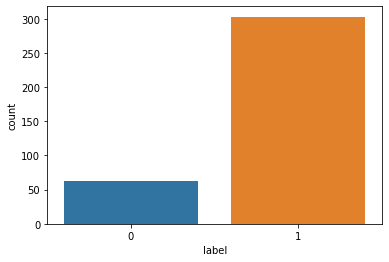

In [3]:
ax = sns.countplot(x="label", data=rainData)
#counted anything over 0mm precipitation as rain
#also only took a sample of the weather once every 24 hours
#I believe this biases the data towards it usually raining, so my dataset could
#definitely be improved 

In [4]:
feature_cols = ['maxtempC', 'mintempC', 'cloudcover', 'humidity','pressure','tempC','visibility']
X = rainData[feature_cols] # Features
y = rainData.label # Target variable

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.25, random_state=25)

In [6]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(max_iter=5000)

# fit the model with data
logreg.fit(X_train,y_train)


y_pred = logreg.predict(X_test)

In [7]:
X_test

,maxtempC,mintempC,cloudcover,humidity,pressure,tempC,visibility
364,27,19,73,85,1015,27,8
225,31,22,45,77,1016,31,9
33,31,17,24,72,1015,31,10
100,34,21,41,60,1014,34,10
45,28,22,43,74,1016,28,12
...,...,...,...,...,...,...,...
188,32,22,59,78,1016,32,9
19,31,16,24,73,1017,31,10
43,31,18,15,66,1016,31,13
283,30,20,41,81,1012,30,9


In [8]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
#This accuracy seems artificially high 

Accuracy: 0.9456521739130435


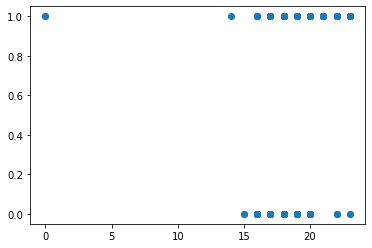

In [9]:
import matplotlib.pyplot as plt
plt.scatter(X['mintempC'],y)
plt.show()

[]

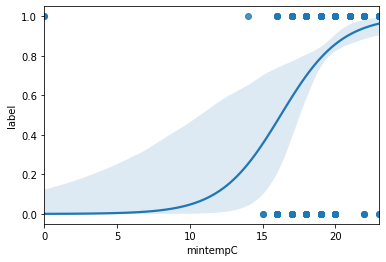

In [10]:
import seaborn as sns
sns.regplot(x = "mintempC", y = "label", data=rainData, logistic = True)
plt.plot()

Text(0.5, 0, 'Importance')

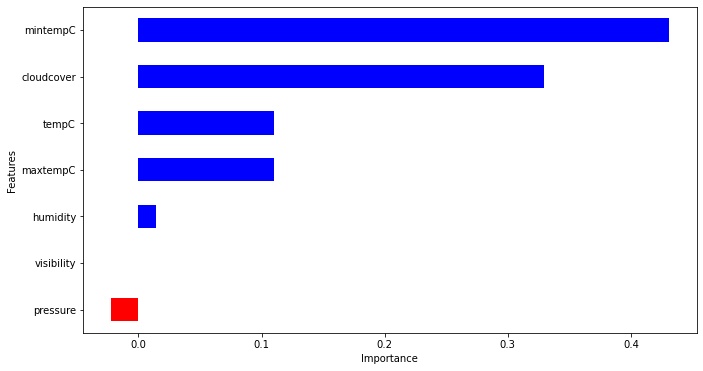

In [11]:
from matplotlib import pyplot as plt
coeff = list(logreg.coef_[0])
labels = list(X_train.columns)
features = pd.DataFrame()
features['Features'] = labels
features['importance'] = coeff
features.sort_values(by=['importance'], ascending=True, inplace=True)
features['positive'] = features['importance'] > 0
features.set_index('Features', inplace=True)
features.importance.plot(kind='barh', figsize=(11, 6),color = features.positive.map({True: 'blue', False: 'red'}))
plt.xlabel('Importance')

In [13]:
frequency = 24
start_date = '1-JAN-2019'
end_date = '31-DEC-2019'
api_key = 'efbb9bbcd1e4494ea8600432201809'
location_list = ['boise']
hist_weather_data = retrieve_hist_data(api_key,
                                location_list,
                                start_date,
                                end_date,
                                frequency,
                                location_label = False,
                                export_csv = True,
                                store_df = True)
                                
#Code I used for the API request, I installed a module called retrieve_hist_data that searches an api called world weather online 



Retrieving weather data for boise


Currently retrieving data for boise: from 2019-01-01 to 2019-01-31
Time elapsed (hh:mm:ss.ms) 0:00:01.181442
Currently retrieving data for boise: from 2019-02-01 to 2019-02-28
Time elapsed (hh:mm:ss.ms) 0:00:02.336689
Currently retrieving data for boise: from 2019-03-01 to 2019-03-31
Time elapsed (hh:mm:ss.ms) 0:00:03.484035
Currently retrieving data for boise: from 2019-04-01 to 2019-04-30
Time elapsed (hh:mm:ss.ms) 0:00:04.488610
Currently retrieving data for boise: from 2019-05-01 to 2019-05-31
Time elapsed (hh:mm:ss.ms) 0:00:05.613699
Currently retrieving data for boise: from 2019-06-01 to 2019-06-30
Time elapsed (hh:mm:ss.ms) 0:00:06.609370
Currently retrieving data for boise: from 2019-07-01 to 2019-07-31
Time elapsed (hh:mm:ss.ms) 0:00:07.744526
Currently retrieving data for boise: from 2019-08-01 to 2019-08-31
Time elapsed (hh:mm:ss.ms) 0:00:08.879251
Currently retrieving data for boise: from 2019-09-01 to 2019-09-30
Time elapsed (hh:mm:ss.

#How Good is your Model?# 

Despite having a high accuracy, I think this model is biased and inaccurate based on random chance. I tried doing another test with higher frequency of polling (every 3 hours) and there were a lot more points where it was not raining. Therefore, I think a model that uses more frequent samples will come to realize that it is usually not raining in Boise. However, I think this model is an accurate measure of the question "Is it going to rain today?". Boise is a large area, and the chance of a few minutes of rain in the early morning is rather high. In the winter months, I am not sure if precipitation is also measuring snow, so this model could also be skewed by snowfall misinterpreted as rain. 

I've included the .csv files so you can take a look at the data and see what I mean. 